<a href="https://colab.research.google.com/github/Sanvee0306/Assignments_DS/blob/main/Assign_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# conda install tweepy
# conda install textblob
# conda install wordcloud


In [4]:
data = pd.read_csv("/content/Elon_musk.csv", encoding = "ISO-8859-1",error_bad_lines=False)


In [5]:
data = [Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data = [Text for Text in data if Text] # removes empty strings, because they are considered in Python as False


In [6]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[5:15]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [15]:
sent_df = pd.DataFrame(sentences, columns= ['Tweet'])
sent_df

,Tweet
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [16]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt


In [19]:
sent_df['Tweet'] = sent_df['Tweet'].apply(cleanUpTweet)


In [20]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity


In [22]:
sent_df['Subjectivity'] = sent_df['Tweet'].apply(getTextSubjectivity)
sent_df['Polarity'] = sent_df['Tweet'].apply(getTextPolarity)


In [24]:
sent_df.head(50)

,Tweet,Subjectivity,Polarity
0,Im an alien Ray tracing on Cyberpunk with H...,0.750000,-0.250000
1,Have you tried it?,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated Congratulations Tesla...,0.483333,0.300000
4,Now on to the next for even more!!,0.250000,0.390625
5,Happy New Year of the Ox!,0.727273,0.485227
6,"Frodo was the underdoge,\nAll thought he woul...",0.400000,0.000000
7,Haha thanks :) Indeed!,0.500000,0.341667
8,Tweets definitely do not represent real-world ...,0.500000,0.000000
9,The most entertaining outcome is the most like...,0.478452,0.173036


In [25]:
sent_df = sent_df.drop(sent_df[sent_df['Tweet'] == ''].index)


In [26]:
sent_df.head(50)

,Tweet,Subjectivity,Polarity
0,Im an alien Ray tracing on Cyberpunk with H...,0.750000,-0.250000
1,Have you tried it?,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated Congratulations Tesla...,0.483333,0.300000
4,Now on to the next for even more!!,0.250000,0.390625
5,Happy New Year of the Ox!,0.727273,0.485227
6,"Frodo was the underdoge,\nAll thought he woul...",0.400000,0.000000
7,Haha thanks :) Indeed!,0.500000,0.341667
8,Tweets definitely do not represent real-world ...,0.500000,0.000000
9,The most entertaining outcome is the most like...,0.478452,0.173036


In [27]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"


In [28]:
sent_df['Score'] = sent_df['Polarity'].apply(getTextAnalysis)


In [29]:
sent_df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,Im an alien Ray tracing on Cyberpunk with H...,0.750000,-0.250000,Negative
1,Have you tried it?,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated Congratulations Tesla...,0.483333,0.300000,Positive
4,Now on to the next for even more!!,0.250000,0.390625,Positive
5,Happy New Year of the Ox!,0.727273,0.485227,Positive
6,"Frodo was the underdoge,\nAll thought he woul...",0.400000,0.000000,Neutral
7,Haha thanks :) Indeed!,0.500000,0.341667,Positive
8,Tweets definitely do not represent real-world ...,0.500000,0.000000,Neutral
9,The most entertaining outcome is the most like...,0.478452,0.173036,Positive


In [31]:
positive = sent_df[sent_df['Score'] == 'Positive']

print(str(positive.shape[0]/(sent_df.shape[0])*100) + " % of positive tweets")


57.57575757575758 % of positive tweets


<BarContainer object of 3 artists>

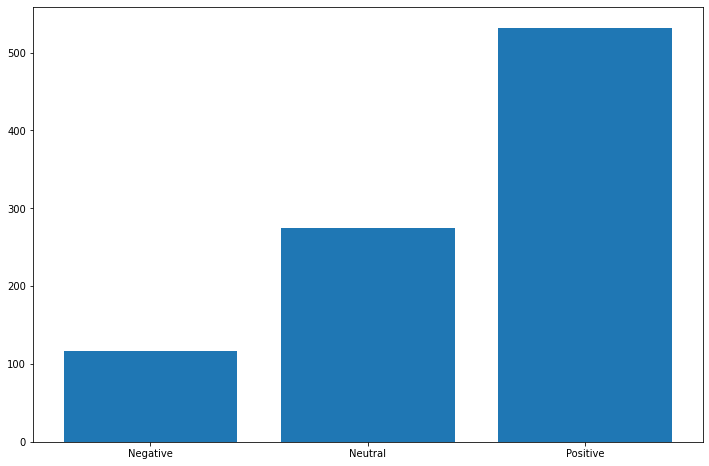

In [32]:
labels = sent_df.groupby('Score').count().index.values

values = sent_df.groupby('Score').size().values

plt.bar(labels, values)


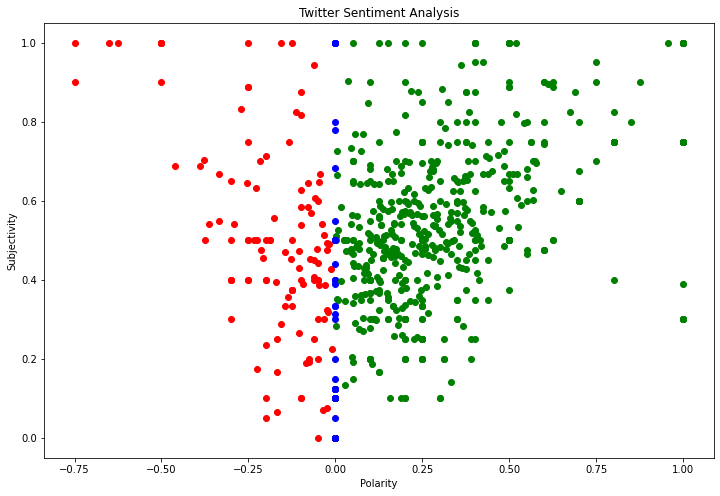

In [33]:
for index, row in sent_df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()


In [34]:
objective = sent_df[sent_df['Subjectivity'] == 0]

print(str(objective.shape[0]/(sent_df.shape[0])*100) + " % of objective tweets")


25.108225108225106 % of objective tweets


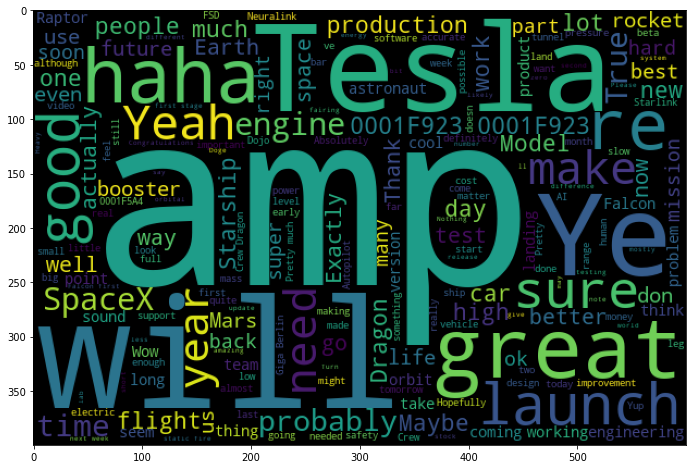

In [35]:
# Creating a word cloud
words = ' '.join([tweet for tweet in sent_df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()


Doing sentiment analysis of the tweets enabled us to calculate numerical values of subjectivity and polarity.

This could help us to understand better this Tweeter account in terms of the language that is being used.

Combining this with additional information about likes and comments can be very useful from marketing point of view and can enable us to find some correlation betweein subjectivity, polarity and the engagement our the users for a Elon Musk Tweeeter account.

